### Marlin

### Input and Output
Input files:
- Marlin feature files: `pt` files (in a folder)
- Label file: `xlsx` file (1 file)

Output files:
- saved the marlin processed file as `npy`

### Functions
sample(arr, max_len=9):
- Processes each feature, ensuring all features have the correct shape

In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
import glob
import os

label_path = 'EmotiW2023 Data Small/engagement_labels.xlsx' # label xlsx file here
marlin_folderpath = 'EmotiW2023 Data Small/marlin/*.pt'     # Marlin pt files here

In [7]:
features = glob.glob(marlin_folderpath) # Read .pt files
print(len(features)) # Check total .pt files

8042


In [8]:
marlin_features = []
for f in tqdm(features):
    marlin_features.append(torch.load(f, map_location=torch.device('cpu')))

100%|██████████████████████████████████████████████████████████████████████████████| 8042/8042 [02:14<00:00, 59.82it/s]


In [9]:
arr = np.array([f.shape[0] for f in marlin_features])
np.unique(arr, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  45,   70,  151,  542,  124,   60,   30,   41, 6918,   61],
       dtype=int64))

In [10]:
def sample(arr, max_len=9):
    hop = int(len(arr)/max_len)
    if len(arr) < max_len:
        return np.pad(arr, [(0, max_len - len(arr)), (0,0)], mode='constant', constant_values=0)
    
    if len(arr) == max_len:
        return arr
    
    samples = []
    for i in range(0, len(arr), hop):
        samples.append(list(arr[i]))
        if len(samples) == max_len:
            return np.array(samples)

In [11]:
labels = pd.read_excel(label_path, index_col=0)
print(labels)

                                   chunk           label
0      subject_68_0ng3yqwrg6_vid_0_0.mp4         Engaged
1      subject_68_0ng3yqwrg6_vid_0_1.mp4  Highly-Engaged
2     subject_68_0ng3yqwrg6_vid_0_10.mp4  Highly-Engaged
3     subject_68_0ng3yqwrg6_vid_0_11.mp4  Highly-Engaged
4     subject_68_0ng3yqwrg6_vid_0_12.mp4         Engaged
...                                  ...             ...
8035   subject_36_gchlu2p5w3_vid_2_5.mp4  Highly-Engaged
8036   subject_36_gchlu2p5w3_vid_2_6.mp4  Barely-engaged
8037   subject_36_gchlu2p5w3_vid_2_7.mp4  Highly-Engaged
8038   subject_36_gchlu2p5w3_vid_2_8.mp4  Highly-Engaged
8039   subject_36_gchlu2p5w3_vid_2_9.mp4  Highly-Engaged

[8040 rows x 2 columns]


In [12]:
labels_map = {}
for label in labels.to_dict(orient='records'):
    labels_map[label['chunk']] = label['label']

labels_map

{'subject_68_0ng3yqwrg6_vid_0_0.mp4': 'Engaged',
 'subject_68_0ng3yqwrg6_vid_0_1.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_10.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_11.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_12.mp4': 'Engaged',
 'subject_68_0ng3yqwrg6_vid_0_13.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_14.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_15.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_16.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_17.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_18.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_19.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_2.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_20.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_21.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_22.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_23.mp4': 'Highly-Engaged',
 'subject_68_0ng3yqwrg6_vid_0_24.mp4': 'Highly-E

In [13]:
errs = []
sampled_features = []

for f in tqdm(features):
    arr = torch.load(f, map_location=torch.device('cpu')).cpu().numpy()
    arr = sample(arr)
    if arr.shape[1] != 1024:
        errs.append(arr)
        continue
    
    name = os.path.basename(f.strip('.pt'))
    if name in labels_map:
        sampled_features.append((name, arr, labels_map[name]))
    else:
        print(f"{name} not found in labels_map")

 55%|█████████████████████████████████████████▌                                  | 4397/8042 [00:03<00:02, 1371.94it/s]

subject_50_randomk7q6709t2k_vid_0_0.mp4 not found in labels_map
subject_50_randomk7q6709t2k_vid_0_1.mp4 not found in labels_map


100%|████████████████████████████████████████████████████████████████████████████| 8042/8042 [00:05<00:00, 1452.62it/s]


In [14]:
sampled_features[0]

('subject_0_2msdhgqawh_vid_0_0.mp4',
 array([[-0.13852222, -0.03409084,  0.30835477, ..., -0.27071905,
         -0.05114482, -0.0084425 ],
        [-0.16257848, -0.05500085,  0.38991776, ..., -0.23623376,
         -0.07379916, -0.00473824],
        [-0.171606  , -0.07018153,  0.36333498, ..., -0.22672045,
         -0.08576258,  0.01905022],
        ...,
        [-0.10186562, -0.04683093,  0.3170146 , ..., -0.2960978 ,
         -0.05658226, -0.0413123 ],
        [-0.11917496,  0.00947589,  0.18174954, ..., -0.27356213,
          0.09654579, -0.00636648],
        [-0.11901491,  0.01756562,  0.17249958, ..., -0.19407684,
         -0.05737707, -0.07285963]], dtype=float32),
 'Engaged')

In [15]:
sampled_features = np.array(sampled_features, dtype='object')
np.save('EmotiW2023 Data Small/Xy_marlin_features_large.npy', sampled_features)

### Combine Openface and Marlin data

In [16]:
Xy_1 = np.load('EmotiW2023 Data Small/Xy_engage_gaze+hp+au_10.npy', allow_pickle=True)
Xy_2 = np.load('EmotiW2023 Data Small/Xy_marlin_features_large.npy', allow_pickle=True)

print(len(Xy_1),len(Xy_2))

8034 8040


In [17]:
x1_fm = {}
for xy in Xy_1:
    x1_fm[xy[0]] = xy[1]

In [19]:
data = []
for idx, xy in enumerate(Xy_2):
    if xy[0] in x1_fm:
        x1 = x1_fm[xy[0]]
    else:
        print(f"Key {xy[0]} not found in x1_fm")
        
    if type(x1)!=tuple:
        data.append((xy[0], xy[1], x1, xy[2]))

Key subject_114_randombn205mtt5s_vid_0_0.mp4 not found in x1_fm
Key subject_28_xf4ogs7wj4_vid_0_0.mp4 not found in x1_fm
Key subject_28_xf4ogs7wj4_vid_0_1.mp4 not found in x1_fm
Key subject_28_xf4ogs7wj4_vid_0_10.mp4 not found in x1_fm
Key subject_61_9lo6k238pu_vid_0_0.mp4 not found in x1_fm
Key subject_61_9lo6k238pu_vid_0_1.mp4 not found in x1_fm


In [20]:
np.save('EmotiW2023 Data Small/Xy_engage_gaze+hp+au_marlin.npy', np.array(data, dtype='object'))

In [21]:
data = np.array(data, dtype='object')
len(data)

7670

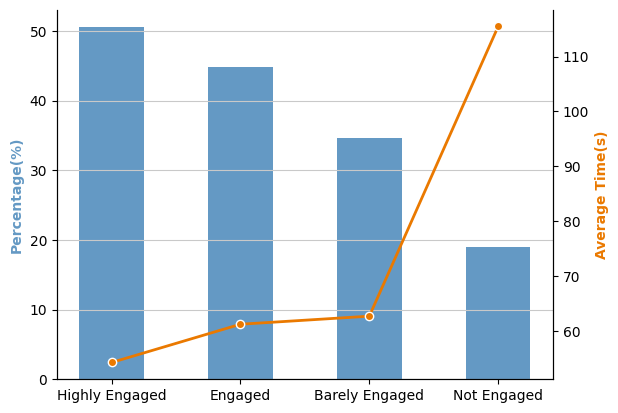

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
x = ['Highly Engaged', 'Engaged', 'Barely Engaged', 'Not Engaged']
y1 = [50.53763441, 44.89795918, 34.61538462, 19.04761905]
y2 = [54.25531915, 61.2244898, 62.69230769, 115.4761905]

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot data on first axis
#ax1.plot(x, y1, 'b-', marker='o')
ax1.bar(x, y1, width=0.5, color='#6499c4')

ax1.spines['top'].set_visible(False)
ax1.set_xlabel('')
ax1.set_ylabel('Percentage(%)', color='#6499c4', weight='bold')

# create second axis
ax2 = ax1.twinx()
ax2.plot(x, y2, color='#ea7900', linewidth=2, marker='o', markeredgecolor='w')
ax2.set_ylabel('Average Time(s)', color='#ea7900', weight='bold')

ax1.yaxis.grid(color='#c9c9c9')
ax2.spines['top'].set_visible(False)

plt.show()